
<h1 style="font-family:Times New Roman">2. Image Based simulation</h1>

The main aim of this approach is to capture the highest ratio of shadowed area to the unshadowed area for the facade, this is calulated using image-proceesing approach and is optimized using __[SciPy differential evolution algorithm](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.differential_evolution.html)__. 

Image-based simulation was proved to be much more time-efficient rather than using irradiance-based simulation to the limit that  100,000 instances have been simulated. 
At each instance, an image of the facade is captured, croped, then, is converted into binary colors i.e. white and black colors. After that, an image-processing algorithm using OpenCV is used to calculate the ratio of the blackpixels to the white pixels, this process is repeated over and over again during the whole optimiztion process as shown in figure.1. 

In [1]:
import json
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

def readTheFile():
    f = open('E:/00-NUS/BUDSLAB/Spatial-temporal-tool/ThreeJs/allRestuls.json', 'r')
    text = f.read()+"]"
    text = text.replace(",\n]", "]")
    j = json.loads(text)
    allvals = []
    allfiles = []
    allXs = []
    for i in j: 
        allvals.append(i['av_val'])
        allfiles.append(i['fname'])
        allXs.append(i['x'])
    return {'vals': allvals, 'files':allfiles, 'X':allXs}

#Define a linear fitting function 
def fitfunc(x, a, b, c, d):
    x = np.array(x)
    return a * x * x * x + b * x * x  + c * x + d

In [2]:
%matplotlib inline

In [3]:
outputdata = readTheFile()
allvals = outputdata['vals'][:100000]
files = outputdata['files'][:100000]
X = outputdata['X'][:100000]
y = allvals

# The optimum cases
The following figure shows the most optimium 25 cases amongst the 100,000 instances and their related shaded ratios. 

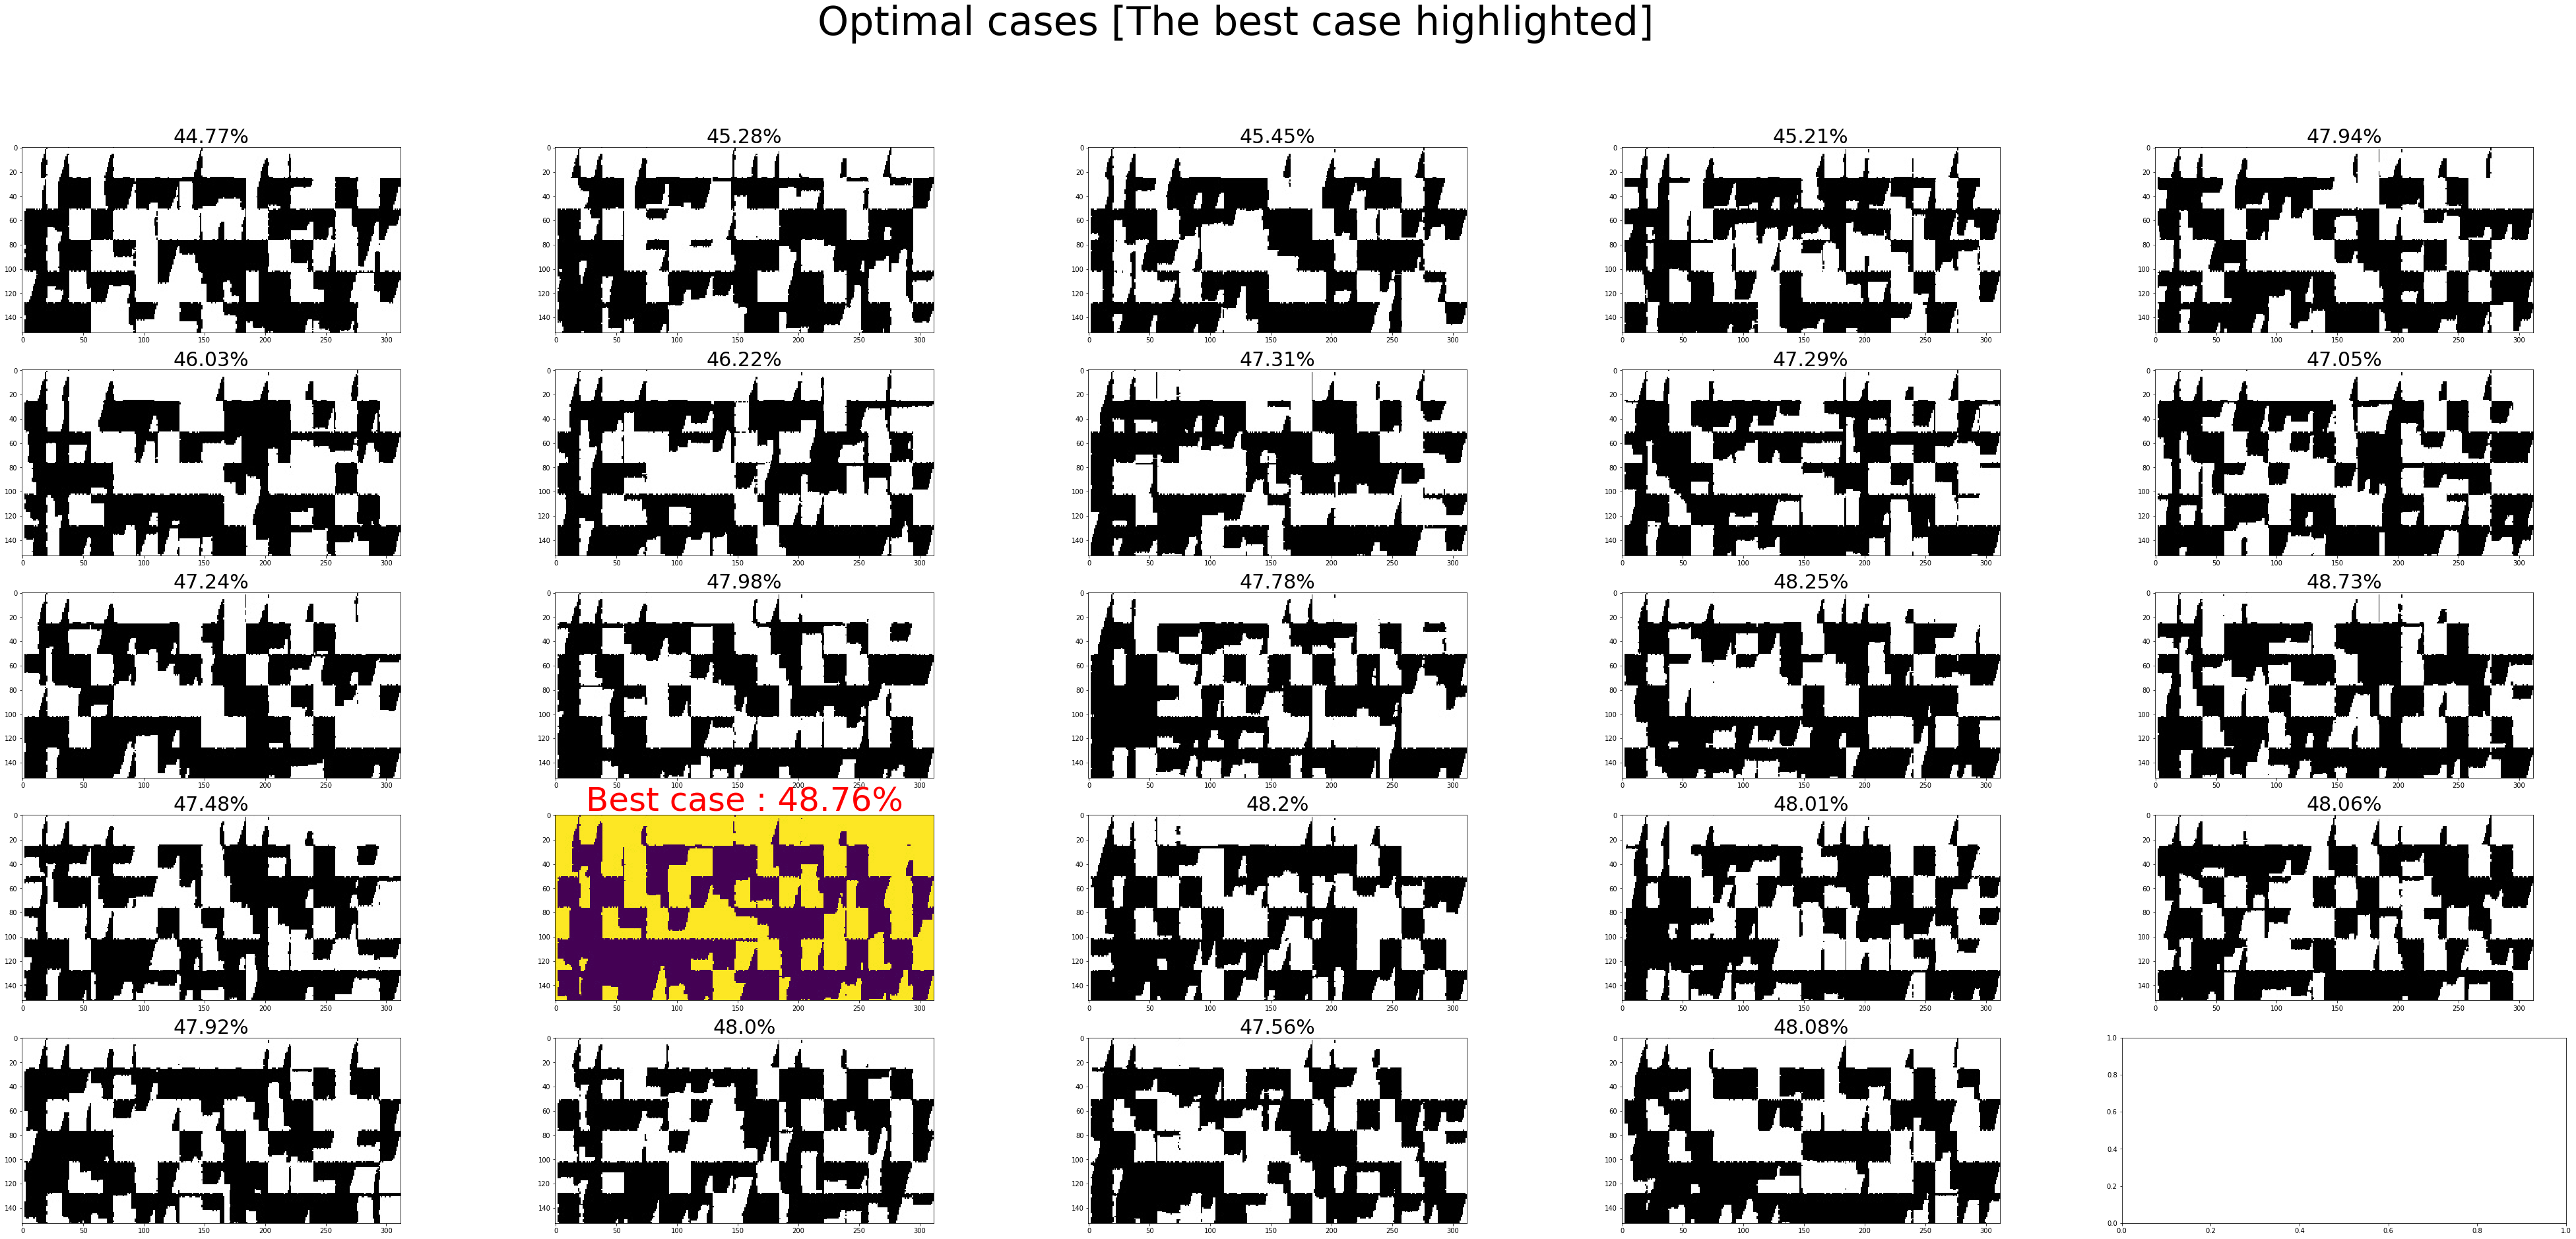

In [4]:
minindices = []
maxindices = []

intervals = 4000
thismin = 1000.
thisminind = 0
for indx, val in enumerate(allvals):
    if indx>0 and float(indx)%float(intervals) == 0:
        minindices.append(thisminind)
        thismin = 1000.
    else:
        if val < thismin:
            thismin = val
            thisminind = indx

rows = 5
cols = 5

fig, ax = plt.subplots( rows, cols )
fig.set_size_inches(70, 30)
fig.suptitle('Optimal cases [The best case highlighted]', fontsize=60)

for i in range(len(minindices)):
    try:
        thisim = plt.imread('E:/00-NUS/BUDSLAB/Spatial-Temporal-Tool/ThreeJs/generatedJPG/'+files[minindices[i]]+'.jpg')
        if minindices[i] == np.argmin(allvals):
            thisim = thisim[:,:,0]
            ax[int(i/rows)][i -int(i/rows)*int(rows)].imshow(thisim)
            ax[int(i/rows)][i -int(i/rows)*rows].set_title("Best case : " + str(100.- round(allvals[minindices[i]], 2)) + '%', fontsize=50, color='r')
        else:
            ax[int(i/rows)][i -int(i/rows)*rows].imshow(thisim)
            ax[int(i/rows)][i -int(i/rows)*rows].set_title(str(100.- round(allvals[minindices[i]], 2)) + '%', fontsize=30)
    except Exception as e:
        print(str(e))

# Worest cases

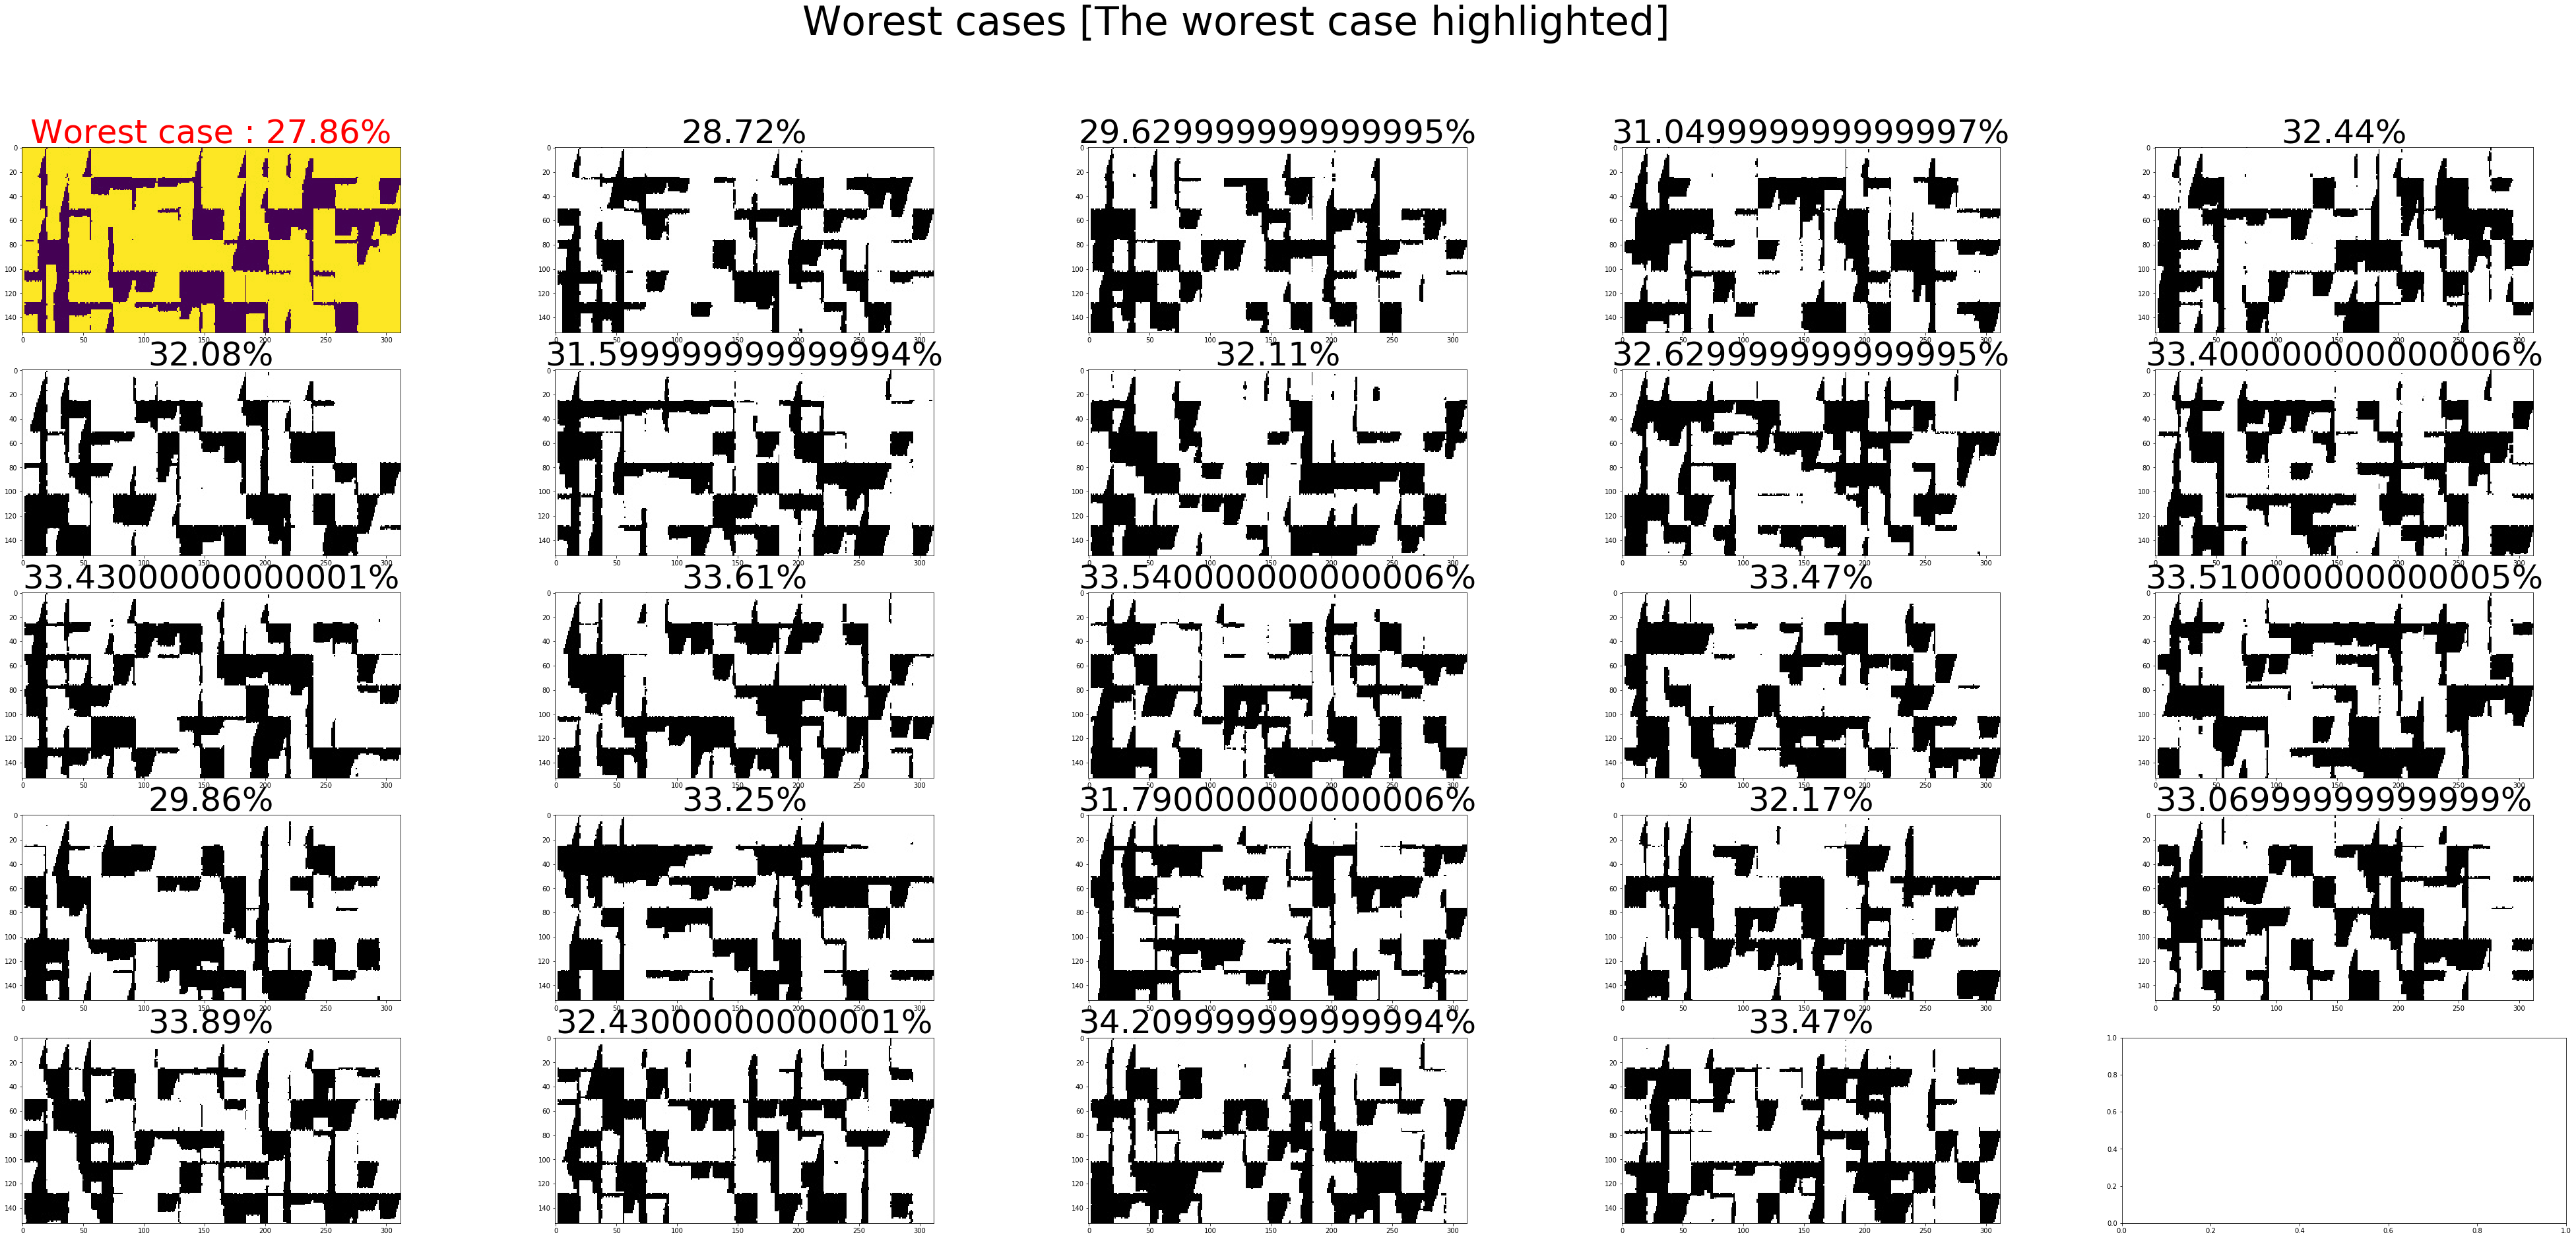

In [5]:
maxindices = []

intervals = 4000
thismax = -200
thismaxind = 0
for indx, val in enumerate(allvals):
    if indx>0 and float(indx)%float(intervals) == 0:
        maxindices.append(thismaxind)
        thismax = -200.
    else:
        if val > thismax:
            thismax = val
            thismaxind = indx

rows = 5
cols = 5

fig, ax = plt.subplots( rows, cols )
fig.set_size_inches(70, 30)
fig.suptitle('Worest cases [The worest case highlighted]', fontsize=60)
for i in range(len(maxindices)):
    try:
        thisim = plt.imread('E:/00-NUS/BUDSLAB/Spatial-Temporal-Tool/ThreeJs/generatedJPG/'+files[maxindices[i]]+'.jpg')
        if maxindices[i] == np.argmax(allvals):
            thisim = thisim[:,:,2]
            ax[int(i/rows)][i -int(i/rows)*int(rows)].imshow(thisim)
            ax[int(i/rows)][i -int(i/rows)*rows].set_title("Worest case : " + str(100.- round(allvals[maxindices[i]], 2)) + '%', fontsize=50, color='r')
        else:
            ax[int(i/rows)][i -int(i/rows)*rows].imshow(thisim)
            ax[int(i/rows)][i -int(i/rows)*rows].set_title(str(100.- round(allvals[maxindices[i]], 2)) + '%', fontsize=50)
    except Exception as e:
        print(str(e))

100000
[-1.69121474e-14  3.26764933e-09 -2.15916334e-04  6.38483544e+01]
51.2380593263 72.1426177309


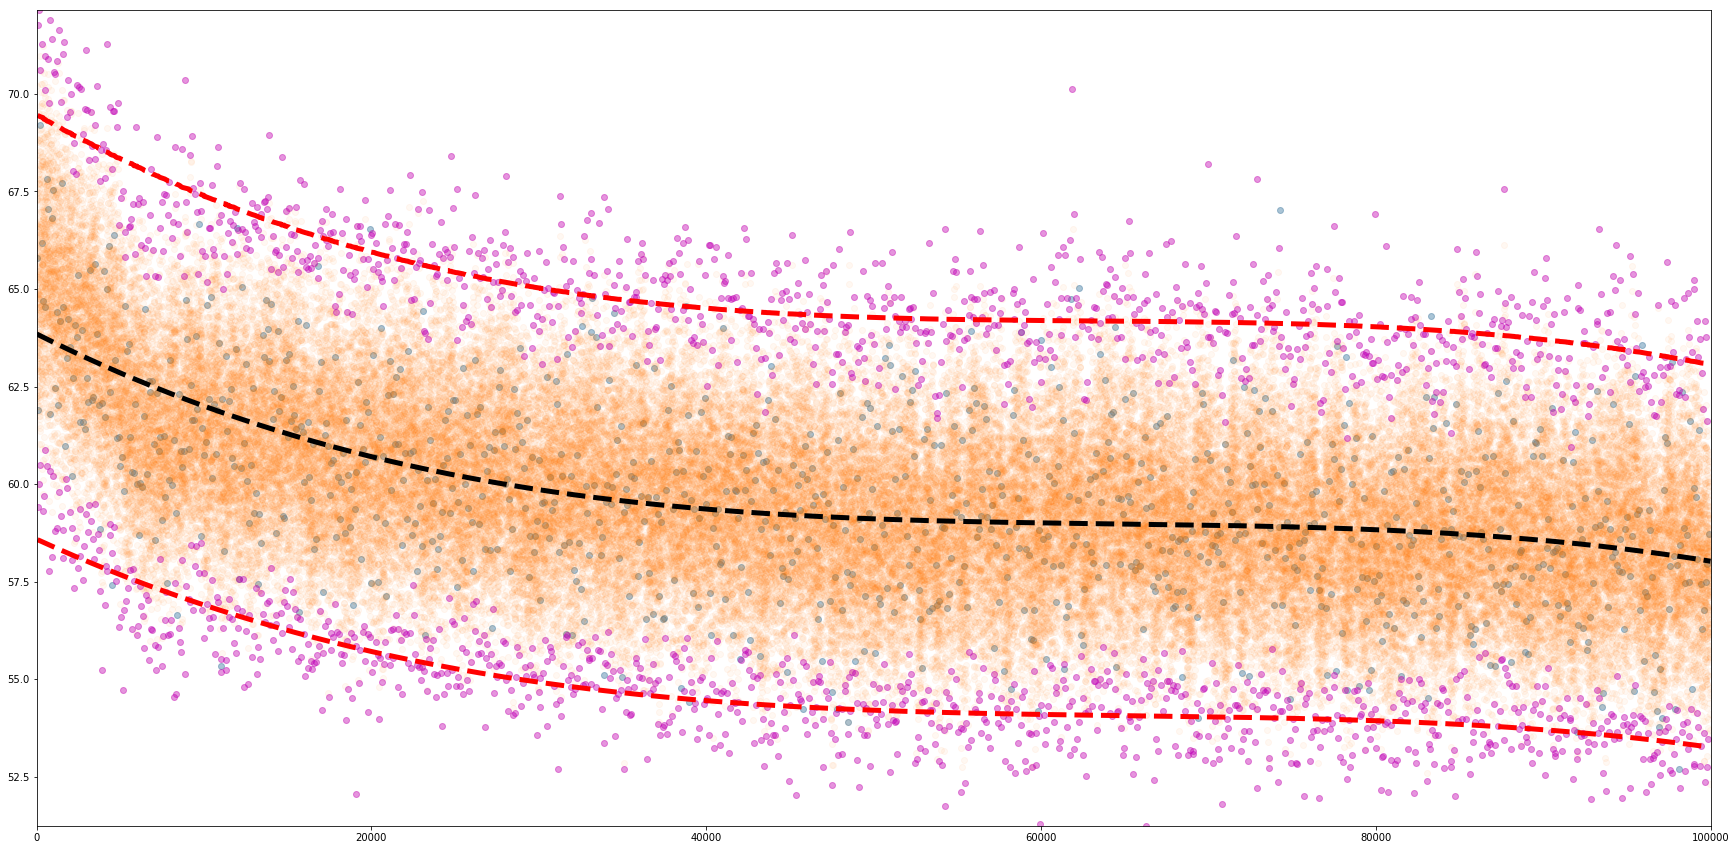

In [6]:

#optaining the fitting curve variables (popt) such that a, b : a = the gradient and b is the intersection with x axis 
popt, pcov = curve_fit(fitfunc, range(len(allvals)), allvals)
print (len(allvals))
print (popt) 

plt.figure(figsize=(30., 15.))
newy = fitfunc(range(len(allvals)), *popt)
plt.plot(range(len(newy)), newy, 'k--', linewidth=5.0)

minindx = []
minvals = []

maxindx = []
maxvals = []


minval = 100.
minind = 0 

maxval = 0.0
maxind = 0
for indx, val in enumerate(allvals):
    if indx > 0 and float(indx) % 100. == 0:
        minindx.append(minind)
        minvals.append(minval)
        
        minval = 100.
        minind = 0
        
        maxindx.append(maxind)
        maxvals.append(maxval)
        
        maxval = 0.0
        maxind = 0
    else:
        if val < minval:
            minval = val
            minind = indx
        if val > maxval:
            maxval = val
            maxind = indx
            
popt2, pcov2 = curve_fit(fitfunc, np.array(minindx), np.array(minvals))
newy2 = fitfunc(np.array(minindx), *popt2)
plt.plot(np.array(minindx), newy2, 'r--', linewidth=5.0)


popt3, pcov3 = curve_fit(fitfunc, np.array(maxindx), np.array(maxvals))
newy3 = fitfunc(np.array(maxindx), *popt3)
plt.plot(np.array(minindx), newy3, 'r--', linewidth=5.0)


print(np.min(allvals), np.max(allvals))

plt.scatter(range(0,len(allvals), 100), allvals[::100] , alpha=0.4)
plt.scatter(range(0,len(allvals)) , allvals , alpha=0.05)
plt.scatter(np.array(minindx), np.array(minvals), color='m', alpha=0.4)

plt.scatter(np.array(maxindx), np.array(maxvals), color='m', alpha=0.4)

plt.xlim(0., len(allvals))
plt.ylim(np.min(allvals),np.max(allvals) )

# for i in range(500):
#     plt.plot([float(i) * 104*5]*2, [np.min(allvals), np.max(allvals)], 'gray', linewidth= 1.0)
plt.show()


<h1 style="font-family:Times New Roman"> Coupled Machine-Learning and differential-evolution optimization </h1>
<p style="font-family:Times New Roman">In this approach, a Support Vector Machines (SVM) machine-learning algorithm is used based on the huge ammount of previously-simulated output as a training dataset which is used then for prediction of the optimum solution using two different non-linear optimization alogrithms, these are : differential evolution and .... </p>

<h3 style="font-family:Times New Roman"> 1. Fitting the training dataset using Support Vector Machines algorithm [10,000 instances]</h3>

In [23]:
#Importing the ML algorithm
from sklearn.svm import SVR


#Fitting input dataset
model = SVR()
model.fit(X[:10000], y[:10000])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<h3 style="font-family:Times New Roman">2. Differential evolution optimization.</h3>

51.29525349108428
[-0.2837893374426064, 0.14929310693837147, -1.950662069873955, -2.0, -1.3681058430347834, -1.5384667090206026, -1.7148491661682532, -1.9415809344099764, -1.5879510068893825, -1.746135692484415, -0.3596286464069771, -1.533666848876509, -1.8841018174068658, -1.557749437929391, -1.9255421400825299, -1.6130456006990748, -2.0, -0.129048820225383, -1.464363062982272, 1.6633740278456155, -0.31861843286858776, 2.0, -0.534989764331312, -0.2701775569679759, 0.9561157250668658, 0.1132627941969292, -0.8735535224698803, -1.4712279347022483, 0.1217035261245546, 1.9960848424117419, -0.26323902390324444, 0.08723019834900751, -1.1773002518211255, -1.4281427826075048, -1.2489125250406374, 0.6682785524565987, -1.7367216947390534, -0.4836937643189668, -2.0, 2.0, -1.295929926730439, -0.9964234321961972, -1.1627316147586593, 1.409029911239211, 0.1464432079464691, 2.0, -1.6072027199778716, 1.3449850370936862, -0.5871662194121683, -0.6939700701449095, -1.1445927704063097, -0.6629335977700325

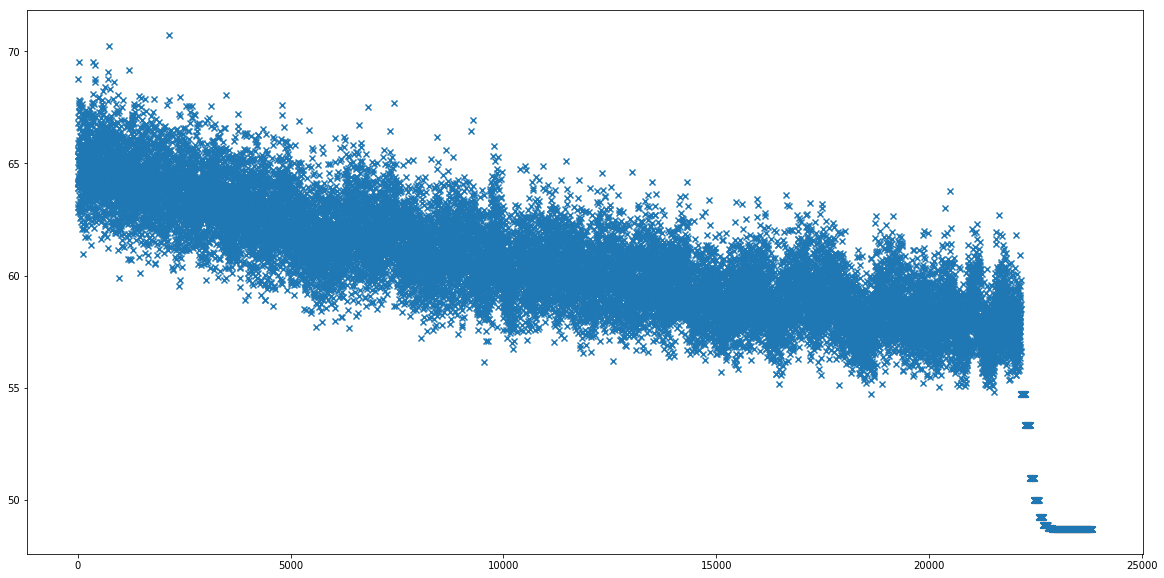

In [11]:
#Importing the differential evolution alogrithm
from scipy.optimize import differential_evolution


interId = 0
res = []

#Defining the obejctive function 
def obfunc(x, *args):
    global model
    r = model.predict([np.array(x),])
    res.append(r[0])
    return r[0]

#Defining the bounds of the objective function 
bounds = [(-2., 2.)]*104
populationSize = 3

result = differential_evolution(obfunc, bounds=bounds, popsize=populationSize)

plt.figure(figsize=(20, 10))
print(100. - result['fun'])
print(result['x'].tolist())
print(len(res))

plt.scatter(range(len(res)), res, marker='x')
plt.show()

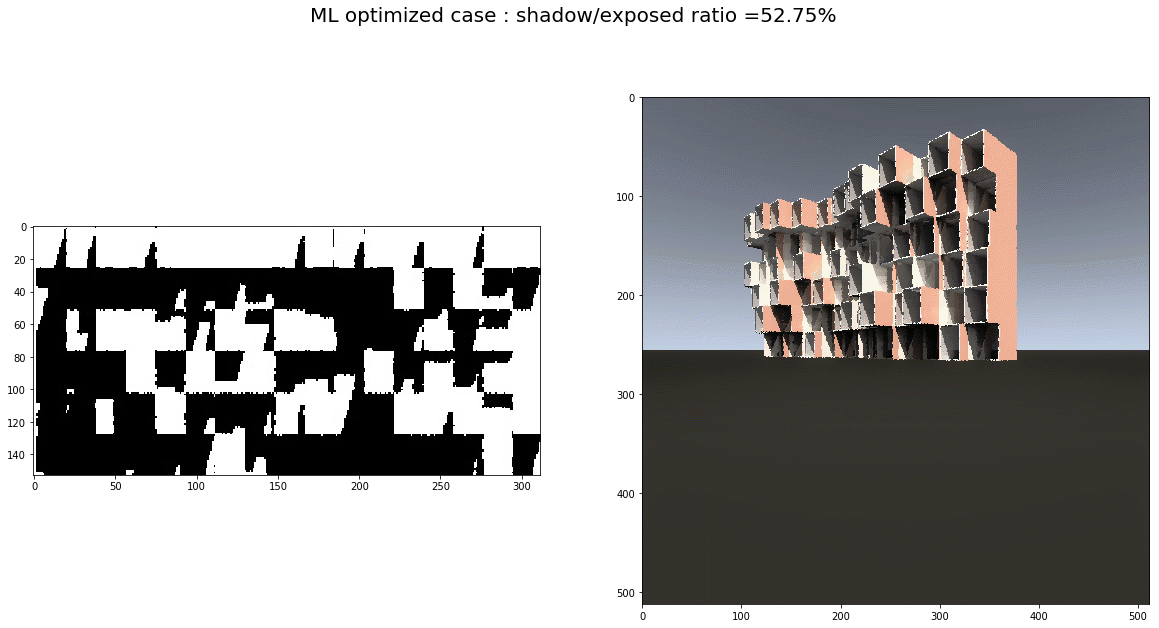

In [22]:
fig3,ax = plt.subplots(1, 2)
im1 = plt.imread("E:/00-NUS/BUDSLAB/spatial-temporal-tool/ThreeJs/image_based/OptimizedFileName_1545300894_97.jpg")
im2 = plt.imread("E:/00-NUS/BUDSLAB/spatial-temporal-tool/ThreeJs/image_based/OptimizedFileName_1545305748_93.bmp")

fig3.set_size_inches(20, 10)
fig3.suptitle('ML optimized case : shadow/exposed ratio =' +str(round(100.-47.2452656276, 2)) +'%', fontsize=20)

ax[0].imshow(im1)

ax[1].imshow(im2)